# Package Installs

In [1]:
# pip install nibabel numpy pandas opencv-python matplotlib seaborn

# Imports

In [2]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
# Using nibabel library to handle NIfTI format data as per research paper
import nibabel as nib
import numpy as np

# Loading Images

In [35]:
# The target data entry
sample_img_raw = nib.load("../data/ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData/BraTS-GLI-00000-000/BraTS-GLI-00000-000-t1c.nii.gz")
sample_img_data = sample_img_raw.get_fdata()

In [36]:
# Each sample is a layered data of width and height 240x240 and 155 slices
sample_img_data = np.swapaxes(sample_img_data, 0, 1) # Rotating image like 3D slicer

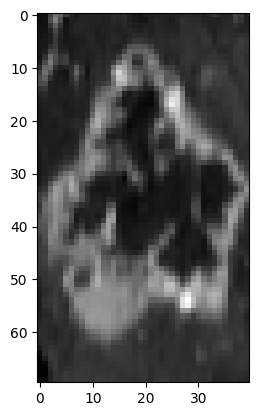

In [48]:
# Viewing individual slice [:,:, slice_number]
plt.imshow(sample_img_data[50:120,120:160,73], cmap='gray') # Cropping to tumour

## Loading all slices in a sample as a grid

In [29]:
def print_grid(img_data: any, num_slices: int, cols: int) -> None:
    """
    :param img_data: The loaded nib file
    :param num_slices: The number of slices to display
    :param cols: The max number of images per row
    :return: 
    """
    
    rows = (num_slices + cols - 1) 
    fig = plt.figure(figsize=(15, 500))
    gs = gridspec.GridSpec(rows, cols, wspace=0.5, hspace=0.5)
    
    for slice_idx in range(num_slices):
        ax = fig.add_subplot(gs[slice_idx // cols, slice_idx % cols])
        ax.imshow(img_data[:, :, slice_idx], cmap='gray')
        ax.axis('off')
        ax.set_title(f"Slice {slice_idx+1}")
    
    plt.show()

### T1 C Data of First Data Entry

In [7]:
sample_img_raw = nib.load("../data/ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData/BraTS-GLI-00000-000/BraTS-GLI-00000-000-t1c.nii.gz")
sample_img_data = sample_img_raw.get_fdata()
sample_img_data.shape

(240, 240, 155)

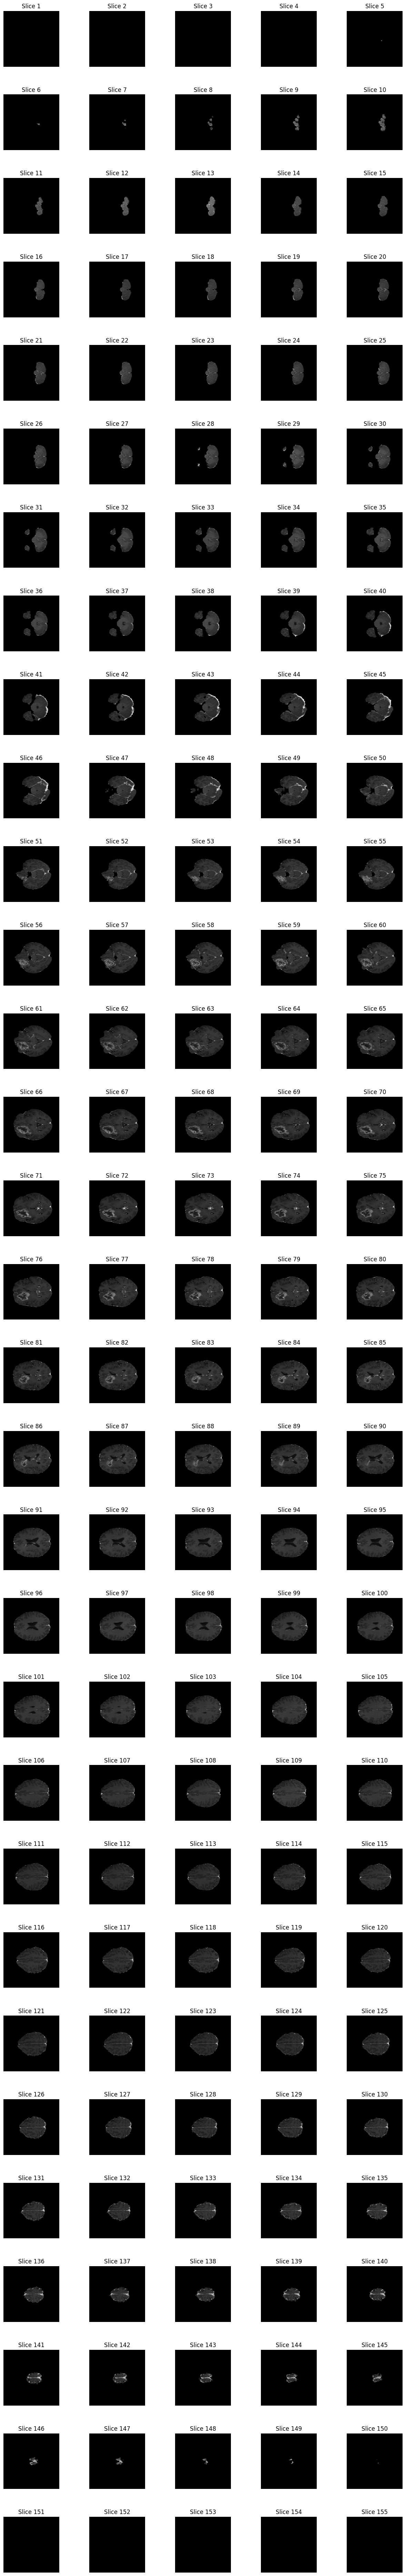

In [8]:
print_grid(sample_img_data, sample_img_data.shape[-1], 5)

### T1 N Data of First Data Entry

In [9]:
sample_img_raw = nib.load("../data/ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData/BraTS-GLI-00000-000/BraTS-GLI-00000-000-t1n.nii.gz")
sample_img_data = sample_img_raw.get_fdata()
sample_img_data.shape

(240, 240, 155)

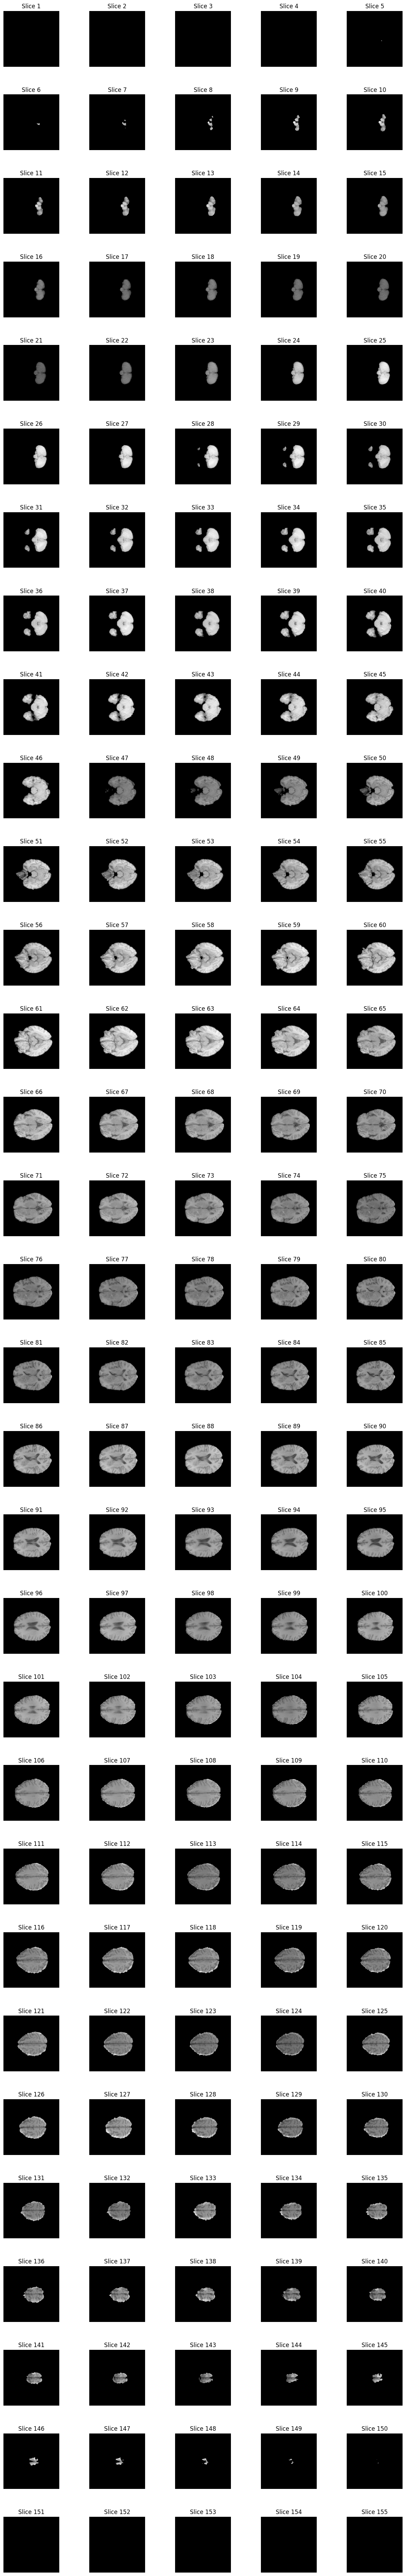

In [10]:
print_grid(sample_img_data, sample_img_data.shape[-1], 5)

### T2 FLAIR Data of First Data Entry

In [11]:
sample_img_raw = nib.load("../data/ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData/BraTS-GLI-00000-000/BraTS-GLI-00000-000-t2f.nii.gz")
sample_img_data = sample_img_raw.get_fdata()
sample_img_data.shape

(240, 240, 155)

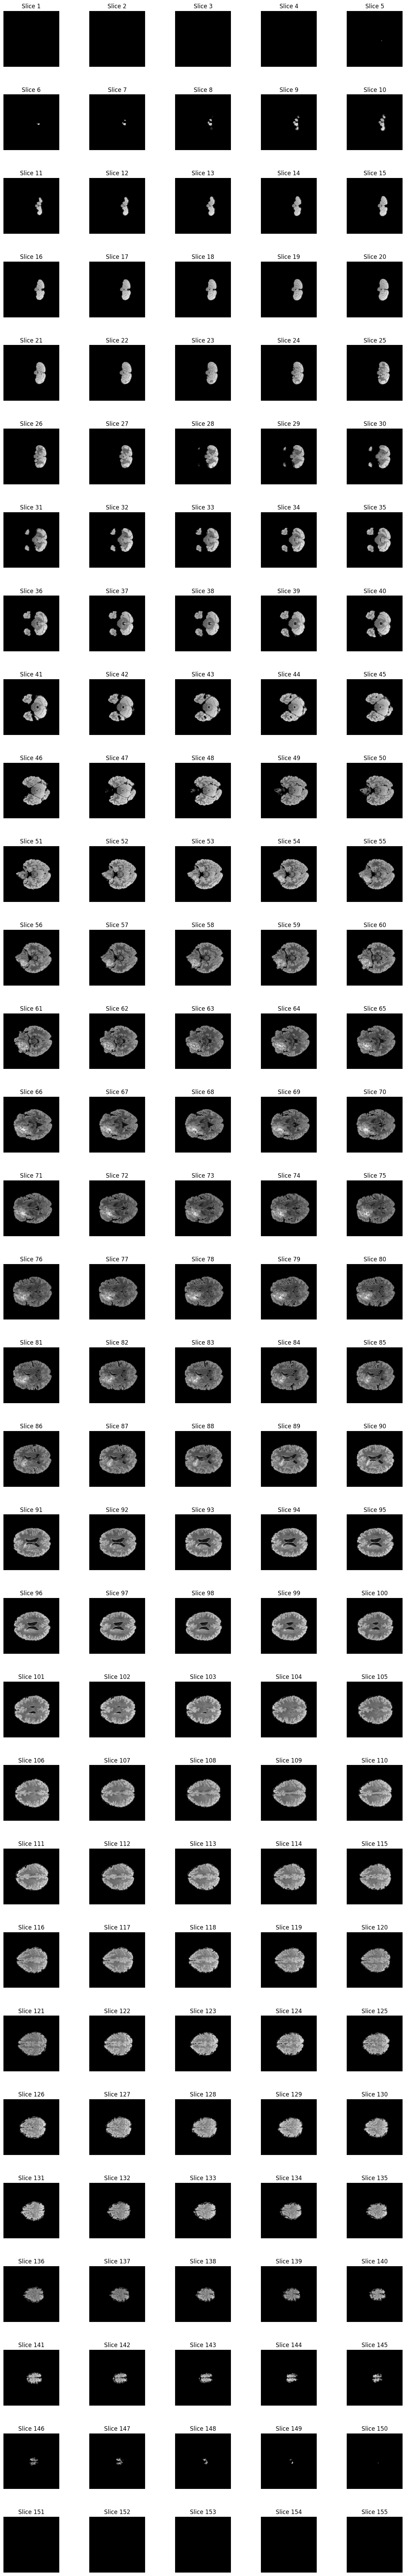

In [12]:
print_grid(sample_img_data, sample_img_data.shape[-1], 5)

### T2 Weighted Data of First Data Entry

In [13]:
sample_img_raw = nib.load("../data/ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData/BraTS-GLI-00000-000/BraTS-GLI-00000-000-t2w.nii.gz")
sample_img_data = sample_img_raw.get_fdata()
sample_img_data.shape

(240, 240, 155)

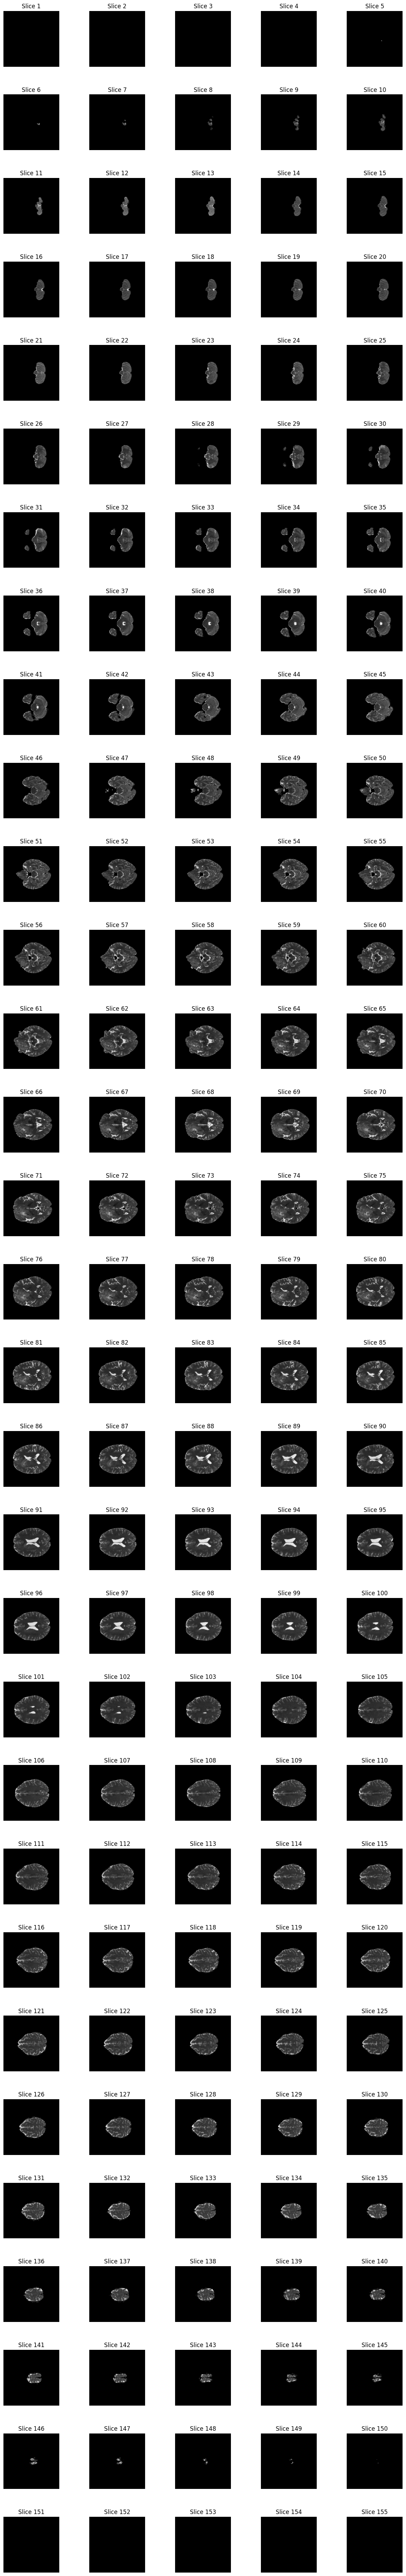

In [14]:
print_grid(sample_img_data, sample_img_data.shape[-1], 5)

### Segment (output/target) Data of First Data Entry

In [15]:
sample_img_raw = nib.load("../data/ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData/BraTS-GLI-00000-000/BraTS-GLI-00000-000-seg.nii.gz")
sample_img_data = sample_img_raw.get_fdata()
sample_img_data.shape

(240, 240, 155)

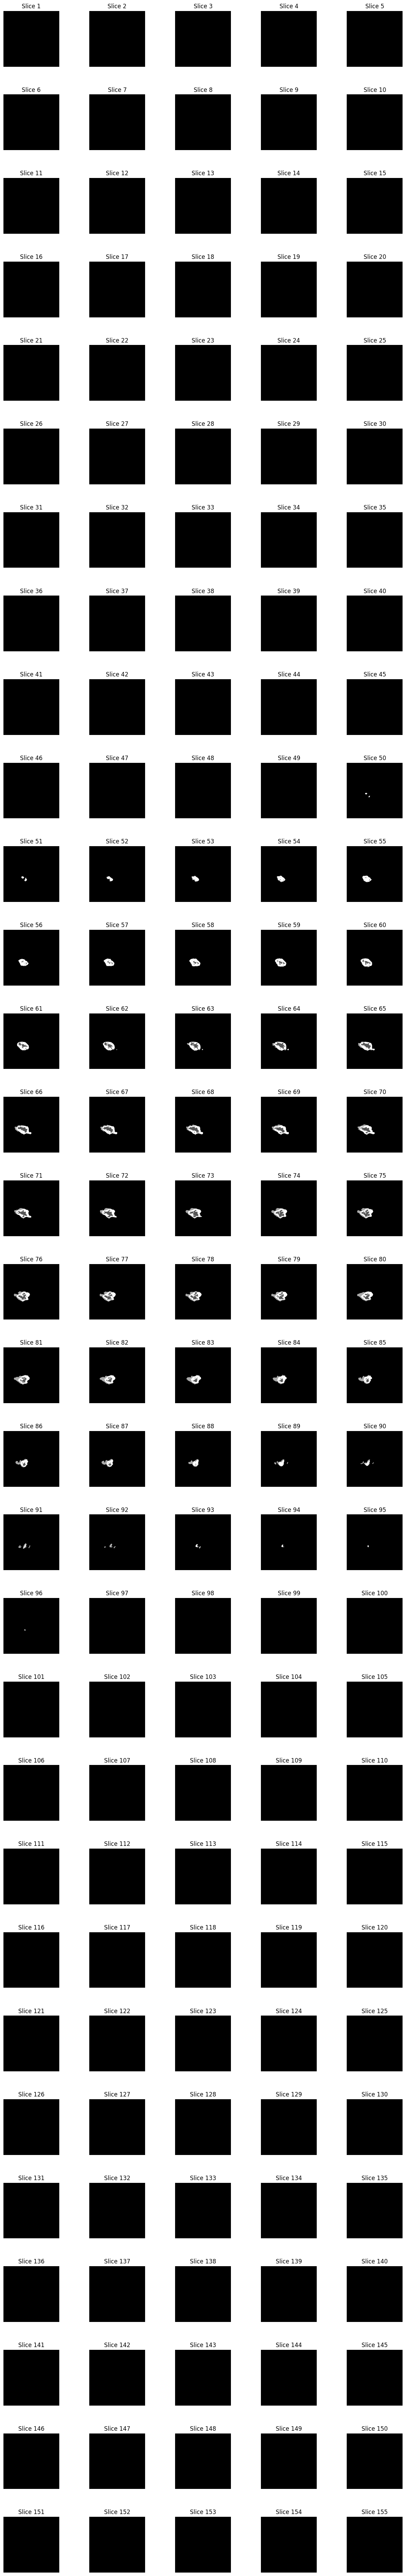

In [16]:
print_grid(sample_img_data, sample_img_data.shape[-1], 5) # This data only shows the tumour area in the frame

In [17]:
target_sample = sample_img_data[:, :, 73] # Examining slice 73 which has a prominent tumour
target_sample.shape

(240, 240)

In [18]:
print(target_sample.min(), target_sample.max()) # Intensity values (brightness range from 0 to 3)

0.0 3.0


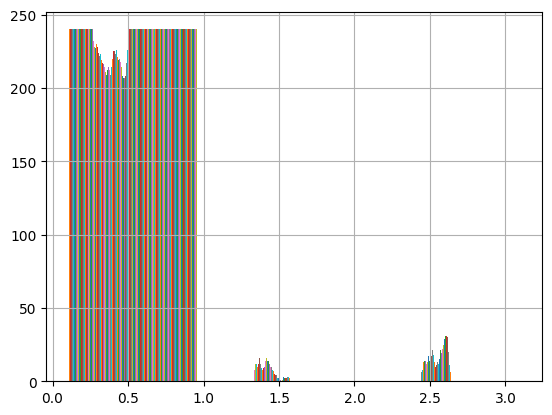

In [27]:
_ = plt.hist(target_sample, bins=3, range=(0.0, 3.2))
plt.grid()

In [ ]:
# Tumour always lies within intensities 0 < n < 3
# We can normalize this range to 0 to 1